In [1]:
import pandas as pd
from pathlib import Path
from os.path import normpath
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, Output, Button, HBox
import datetime
import numpy as np

In [2]:
data_path = Path('data/cleaned')

In [3]:
sentiment_path = data_path / 'sentiment_all_cleaned.csv'

In [4]:
sentiment_path = sentiment_path.resolve(True)

In [5]:
top50_dim_path = data_path / 'top_50_dim.csv'

In [6]:
top50_dim_path = top50_dim_path.resolve(True)

In [7]:
sent_df = pd.read_csv(sentiment_path, index_col= 'date', date_format= '%Y-%m-%d')

In [8]:
top50_dim_df = pd.read_csv(top50_dim_path)

In [9]:
date_ranges = sent_df.index.to_series().agg(['min', 'max'])

In [10]:
date_merge = pd.DataFrame(index= pd.date_range(start= date_ranges['min'], end= date_ranges['max'], freq='D'))

In [11]:
for file in Path('data/raw/stock_prices').resolve().iterdir():
    ticker = file.name.split('_')[0]
    df = pd.read_csv(file, usecols= ['Date', 'Close'])
    df.index = pd.to_datetime(df.Date, format= '%Y-%m-%d %H:%M:%S%z', utc= True)
    df.drop('Date', axis= 1, inplace= True)
    df.index = pd.to_datetime(df.index.date)
    df = df.rename(columns= {'Close': ticker})
    df.index.name = 'date'
    date_merge = pd.merge(date_merge, df, how= 'left', left_index= True, right_index= True)

In [12]:
for file in Path('data/raw/stock_prices').resolve().iterdir():
    ticker = file.name.split('_')[0]
    df = pd.read_csv(file, usecols= ['Date', 'Close'])
    df.index = pd.to_datetime(df.Date, format= '%Y-%m-%d %H:%M:%S%z', utc= True)
    df.drop('Date', axis= 1, inplace= True)
    df.index = pd.to_datetime(df.index.date)
    df = df.rename(columns= {'Close': ticker})
    df.index.name = 'date'
    print(f'{ticker:7} | {df[ticker].isna().sum()}')

7201.T  | 0
AAL     | 0
AIR.PA  | 0
AMAT    | 0
AXP     | 0
BAC     | 0
BX      | 0
CCL     | 0
CMCSA   | 0
COP     | 0
CRM     | 0
CVS     | 0
CVX     | 0
DAL     | 0
DUK     | 0
D       | 0
ENB.TO  | 0
FDX     | 0
GD      | 0
GIS     | 0
GME     | 0
HAS     | 0
HMC     | 0
IBN     | 0
INFY    | 0
JBLU    | 0
JNJ     | 0
KR      | 0
LYG     | 0
MAR     | 0
MRK     | 0
MS      | 0
MU      | 0
NVDA    | 0
ORCL    | 0
P911.F  | 0
PEP     | 0
PYPL    | 0
RTX     | 0
SAN.MC  | 0
SBUX    | 0
SLB     | 0
SNAP    | 0
STM     | 0
TSLA    | 0
TSN     | 0
T       | 0
UA      | 0
WFC     | 0
WMT     | 0


In [13]:
check_date_index = pd.date_range(start= date_ranges['min'], end= date_ranges['max'], freq='D')

In [14]:
date_merge.query("index in @check_date_index").isnull().sum()

7201.T    1692
AAL       1613
AIR.PA    1550
AMAT      1613
AXP       1613
BAC       1613
BX        1613
CCL       1613
CMCSA     1613
COP       1613
CRM       1613
CVS       1613
CVX       1613
DAL       1613
DUK       1613
D         1613
ENB.TO    1623
FDX       1613
GD        1613
GIS       1613
GME       1613
HAS       1613
HMC       1613
IBN       1613
INFY      1613
JBLU      1613
JNJ       1613
KR        1613
LYG       1613
MAR       1613
MRK       1613
MS        1613
MU        1613
NVDA      1613
ORCL      1613
P911.F    4812
PEP       1613
PYPL      2997
RTX       1613
SAN.MC    1551
SBUX      1613
SLB       1613
SNAP      3415
STM       1613
TSLA      1735
TSN       1613
T         1613
UA        3178
WFC       1613
WMT       1613
dtype: int64

In [15]:
for comp in top50_dim_df.company_sent:
    total_na = sent_df.query("company == @comp").isna().sum().sum()
    date_ranges = sent_df.query("company == @comp").index.to_series().agg(['min', 'max'])
    total_days = sent_df.query("company == @comp").index.to_series().shape
    print(f'{comp:23} | NA: {total_na:5} | {date_ranges['min']} | {date_ranges['max']} | {total_days}')

morgan_stanley          | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
tesla_motors            | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
bank_of_america         | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
airbus                  | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
wells_fargo             | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
nvidia                  | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
johnson_johnson         | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
oracle                  | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
at_t                    | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
walmart                 | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
salesforce_com          | NA:     0 | 2010-01-01 00:00:00 | 2024-03-09 00:00:00 | (5182,)
american_e

In [16]:
def piper(df):
    return df[df < 1800]

In [17]:
target_comp = date_merge.isna().sum().pipe(piper).keys()

In [18]:
target_comp

Index(['7201.T', 'AAL', 'AIR.PA', 'AMAT', 'AXP', 'BAC', 'BX', 'CCL', 'CMCSA',
       'COP', 'CRM', 'CVS', 'CVX', 'DAL', 'DUK', 'D', 'ENB.TO', 'FDX', 'GD',
       'GIS', 'GME', 'HAS', 'HMC', 'IBN', 'INFY', 'JBLU', 'JNJ', 'KR', 'LYG',
       'MAR', 'MRK', 'MS', 'MU', 'NVDA', 'ORCL', 'PEP', 'RTX', 'SAN.MC',
       'SBUX', 'SLB', 'STM', 'TSLA', 'TSN', 'T', 'WFC', 'WMT'],
      dtype='object')

In [19]:
date_merge[target_comp].shape

(5182, 46)

In [20]:
date_merge[target_comp].dropna().shape

(2546, 46)

In [21]:
comp_merge_df = date_merge[target_comp].dropna()

In [22]:
comp_merge_df.index.to_series().agg(['min', 'max'])

min   2010-06-29
max   2024-03-07
dtype: datetime64[ns]

In [23]:
comp_merge_df.isna().sum()

7201.T    0
AAL       0
AIR.PA    0
AMAT      0
AXP       0
BAC       0
BX        0
CCL       0
CMCSA     0
COP       0
CRM       0
CVS       0
CVX       0
DAL       0
DUK       0
D         0
ENB.TO    0
FDX       0
GD        0
GIS       0
GME       0
HAS       0
HMC       0
IBN       0
INFY      0
JBLU      0
JNJ       0
KR        0
LYG       0
MAR       0
MRK       0
MS        0
MU        0
NVDA      0
ORCL      0
PEP       0
RTX       0
SAN.MC    0
SBUX      0
SLB       0
STM       0
TSLA      0
TSN       0
T         0
WFC       0
WMT       0
dtype: int64

In [24]:
comp_merge_df.head()

7201.T       AAL     AIR.PA      AMAT        AXP        BAC  \
2010-06-29  421.154358  8.051012  13.410769  9.645330  32.336689  11.504170   
2010-06-30  407.698975  8.117006  13.025217  9.410460  32.166542  11.346254   
2010-07-06  419.808777  7.617350  13.319346  9.222566  31.769516  11.101484   
2010-07-07  437.300842  8.786352  13.450514  9.543555  33.341385  11.614713   
2010-07-08  432.591461  8.993753  13.522060  9.480920  34.127319  11.733149   

                  BX        CCL     CMCSA        COP  ...        RTX  \
2010-06-29  5.255601  22.589527  6.432302  22.612816  ...  28.614908   
2010-06-30  5.277683  22.664482  6.319519  22.272535  ...  28.588482   
2010-07-06  5.078943  22.851849  6.510829  22.322432  ...  28.447546   
2010-07-07  5.277683  23.653805  6.525457  23.211706  ...  29.310793   
2010-07-08  5.614441  23.668791  6.525457  23.388651  ...  29.610285   

              SAN.MC      SBUX        SLB       STM      TSLA        TSN  \
2010-06-29  3.603797  9.507668  38.770199  5.351019  1.592667  12.783216   
2010-06-30  3.586067  9.237758  38.953217  5.310739  1.588667  12.508467   
2010-07-06  4.043347  8.975450  39.094002  5.377877  1.074000  12.615314   
2010-07-07  4.102721  9.275774  40.501770  5.606150  1.053333  12.897691   
2010-07-08  4.110555  9.443043  41.205666  5.666577  1.164000  13.126645   

                   T        WFC        WMT  
2010-06-29  6.211148  17.356291  11.872464  
2010-06-30  6.142587  17.135408  11.670948  
2010-07-06  6.198454  16.834198  11.792346  
2010-07-07  6.322161  17.844919  11.877321  
2010-07-08  6.384528  17.831535  11.940441  

[5 rows x 46 columns]

In [25]:
count_missing_days_range = pd.date_range(start= date_ranges['min'], end= date_ranges['max'], freq='B')

In [26]:
count_missing_days_range.shape

(3701,)

In [27]:
comp_merge_df.shape

(2546, 46)

In [28]:
comp_dates = comp_merge_df.index.to_numpy()

In [29]:
(comp_dates[1] - comp_dates[0]).astype('timedelta64[D]').astype('int8')

np.int8(1)

In [30]:
for i in range(len(comp_dates) - 1):
    time_diff = (comp_dates[i+1] - comp_dates[i]).astype('timedelta64[D]').astype('int8')
    if time_diff > 4:
        previous_time = datetime.datetime.fromisoformat(str(comp_dates[i])).strftime('%Y-%m-%d')
        next_time = datetime.datetime.fromisoformat(str(comp_dates[i+1])).strftime('%Y-%m-%d')
        print(f'{time_diff:3} lost days between {previous_time} and {next_time}')

  6 lost days between 2010-06-30 and 2010-07-06
  5 lost days between 2010-07-15 and 2010-07-20
  5 lost days between 2010-07-29 and 2010-08-03
  5 lost days between 2010-09-02 and 2010-09-07
  5 lost days between 2010-10-07 and 2010-10-12
  5 lost days between 2010-11-18 and 2010-11-23
  5 lost days between 2010-11-24 and 2010-11-29
  8 lost days between 2010-12-21 and 2010-12-29
  6 lost days between 2010-12-29 and 2011-01-04
  5 lost days between 2011-01-13 and 2011-01-18
  5 lost days between 2011-02-09 and 2011-02-14
  5 lost days between 2011-02-17 and 2011-02-22
  5 lost days between 2011-04-20 and 2011-04-25
  8 lost days between 2011-04-27 and 2011-05-05
  5 lost days between 2011-05-19 and 2011-05-24
  5 lost days between 2011-05-26 and 2011-05-31
  5 lost days between 2011-06-30 and 2011-07-05
  5 lost days between 2011-07-28 and 2011-08-02
  5 lost days between 2011-09-01 and 2011-09-06
  5 lost days between 2011-09-21 and 2011-09-26
  5 lost days between 2011-10-06 and 201

In [76]:
def log_cum_returns(df):
    return np.log(df).diff().cumsum()

In [33]:
comp_merge_df.diff().mean().nlargest(10)

CRM       0.109653
GD        0.088148
MAR       0.086128
AMAT      0.078818
AXP       0.073832
FDX       0.072081
TSLA      0.069571
AIR.PA    0.055253
PEP       0.046424
7201.T    0.046213
dtype: float64

In [71]:
top_10_returns = comp_merge_df.diff().mean().nlargest(10).keys()

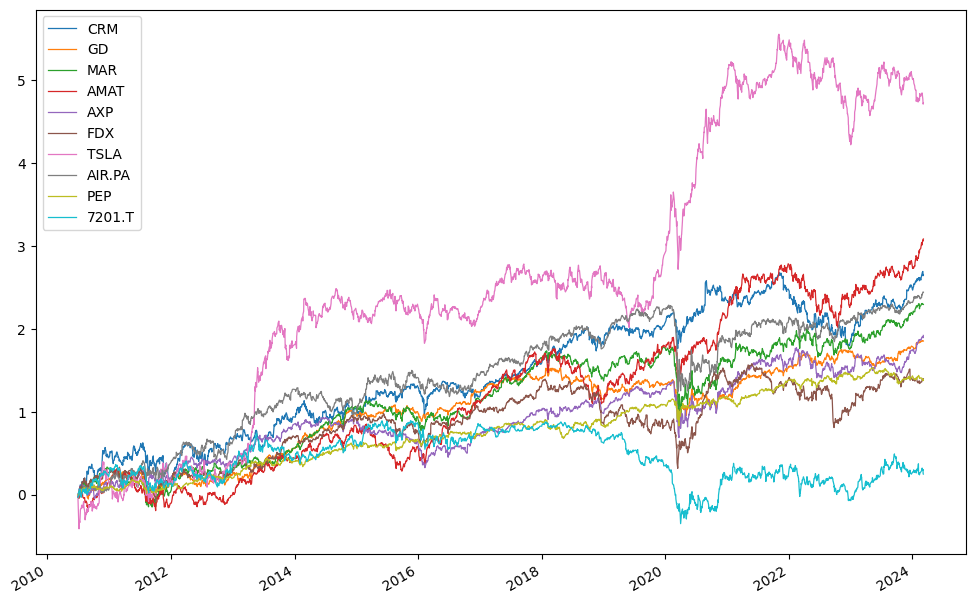

In [78]:
comp_merge_df[top_10_returns].pipe(log_cum_returns).plot(linewidth= 0.9, figsize=(12,8))
plt.show()

In [218]:
def std_periods(ser : pd.Series):
    daily = ser.std().mean()
    weekly = ser.groupby(pd.Grouper(freq= 'W')).sum().std()
    monthly = ser.groupby(pd.Grouper(freq= 'ME')).sum().std()
    yearly = ser.groupby(pd.Grouper(freq= 'YE')).sum().std()
    return pd.DataFrame([{'d': daily, 'w': weekly, 'm': monthly, 'y': yearly}], ['std'])

In [219]:
def log_returns(df):
    return np.log(df).diff()

In [220]:
comp_merge_df['7201.T'].pipe(log_returns).pipe(std_periods)

d        w         m         y
std  0.023172  0.04296  0.083996  0.190075

In [221]:
comp_merge_df['7201.T'].pipe(log_returns).groupby(pd.Grouper(freq= 'YE')).std().mean()

np.float64(0.022485968331364074)

In [222]:
comp_merge_df['7201.T'].pipe(log_returns)

2010-06-29         NaN
2010-06-30   -0.032470
2010-07-06    0.029270
2010-07-07    0.040822
2010-07-08   -0.010828
                ...   
2024-02-29    0.008793
2024-03-04   -0.026441
2024-03-05    0.008777
2024-03-06   -0.048987
2024-03-07   -0.005775
Name: 7201.T, Length: 2546, dtype: float64

In [223]:
comp_merge_df['TSLA'].pipe(log_returns).pipe(std_periods)

d         w         m        y
std  0.041765  0.077025  0.166965  0.72878

In [235]:
comp_merge_df.index.to_series().agg(['min','max'])

min   2010-06-29
max   2024-03-07
dtype: datetime64[ns]

In [233]:
comp_merge_df.shape

(2546, 46)

In [234]:
2546 / 250

10.184

In [514]:
rand_samp = []
for i in range(1000):
    rand_samp.append(comp_merge_df['TSLA'].pipe(log_returns).sample(15).sum())

print(pd.Series(rand_samp).std())

0.16457659669172545


In [508]:
rand_samp = []
date_ranges = comp_merge_df.index.to_series().agg(['min','max'])
for i in range(1000):
    rand_samp.append(comp_merge_df['TSLA'].pipe(log_returns).sample(20).sum())

print(pd.Series(rand_samp).std())

0.18496211978599097


In [468]:
date_ranges = comp_merge_df.index.to_series().agg(['min','max'])

In [573]:
time_delta = np.timedelta64(10, 'D')

In [574]:
min_date = date_ranges['min'] + time_delta
max_date = date_ranges['max'] - time_delta

In [575]:
min_max_ranges = pd.date_range(start= min_date, end= max_date, freq='D')
target_dates = pd.Series(np.intersect1d(comp_merge_df.index.to_numpy(), min_max_ranges.to_numpy()))

In [576]:
sample_std = []
for i in range(300):
    sample_date = target_dates.sample(1)
    target_start = sample_date - time_delta
    target_end = sample_date + time_delta
    search_range = pd.date_range(start= pd.Timestamp(target_start.dt.date.iloc[0]), end= pd.Timestamp(target_end.dt.date.iloc[0]), freq= '1D')
    sample_std.append(comp_merge_df['TSLA'].pipe(log_returns).to_frame().query("index in @search_range").sum().iloc[0])

print(pd.Series(sample_std).std())

0.1313997917527611


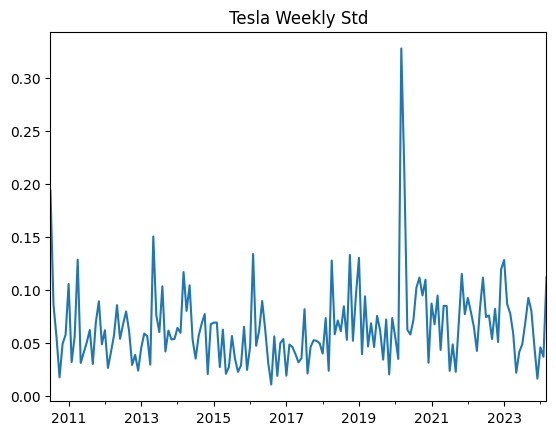

0.06496341742261964


In [639]:
# can only get weekly and monthly volatility (don't have hour prices, so I can't get daily volatitlity)
comp_merge_df['TSLA'].pipe(log_returns).groupby(pd.Grouper(freq='W-SUN')).sum().groupby(pd.Grouper(freq= 'ME')).std().plot()
plt.title('Tesla Weekly Std')
plt.show()
print(comp_merge_df['TSLA'].pipe(log_returns).groupby(pd.Grouper(freq='W')).sum().groupby(pd.Grouper(freq= 'ME')).std().mean())

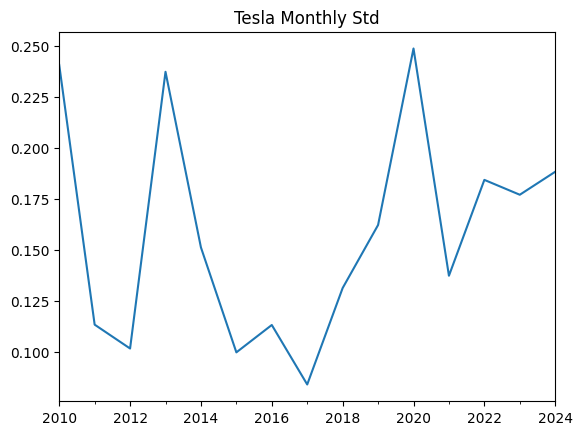

0.158062200726301


In [638]:
comp_merge_df['TSLA'].pipe(log_returns).groupby(pd.Grouper(freq='ME')).sum().groupby(pd.Grouper(freq= 'YE')).std().plot()
plt.title('Tesla Monthly Std')
plt.show()
print(comp_merge_df['TSLA'].pipe(log_returns).groupby(pd.Grouper(freq='ME')).sum().groupby(pd.Grouper(freq= 'YE')).std().mean())

In [735]:
# log returns and sentiment correlation
comp_names = comp_merge_df.keys()
comp_named_tup = top50_dim_df[['company_sent', 'ticker']].query("ticker in @comp_names").itertuples()
comp_sent_df = sent_df.query("company in @comp_sent_names")
for comp in comp_named_tup:
    ms_sent = comp_sent_df.query("company == @comp.company_sent")['sentiment'].pipe(lambda x: x - 0.5)
    ms_ret = comp_merge_df[comp.ticker].pipe(log_returns)
    ms_combined = pd.merge(ms_ret, ms_sent, left_index= True, right_index= True).dropna().to_numpy()    
    print(f'{comp.ticker:8} | Corr: {np.corrcoef(ms_combined.T)[0,1]}')

MS       | Corr: 0.3125280720813441
TSLA     | Corr: 0.30738975193166945
BAC      | Corr: 0.32524440201827365
AIR.PA   | Corr: 0.07366807868775657
WFC      | Corr: 0.20510197196991373
NVDA     | Corr: 0.3029555294053939
JNJ      | Corr: 0.19278986064402684
ORCL     | Corr: 0.1715723323785207
T        | Corr: 0.17084525103934114
WMT      | Corr: 0.18923455912671894
CRM      | Corr: 0.19727464795029517
AXP      | Corr: 0.15938958184228377
CVX      | Corr: 0.35546802540637323
MRK      | Corr: 0.24852441687832877
SBUX     | Corr: 0.14275284063077562
HMC      | Corr: 0.2666672426037569
7201.T   | Corr: 0.11732820882618056
CMCSA    | Corr: 0.1294542100845715
PEP      | Corr: 0.11318073332831119
DAL      | Corr: 0.21668566765501532
FDX      | Corr: 0.2008033910858624
INFY     | Corr: 0.30261823014916406
MAR      | Corr: 0.16365893004602158
AAL      | Corr: 0.21901959673167917
MU       | Corr: 0.33699434423859476
GME      | Corr: 0.1867370689827845
RTX      | Corr: 0.21666237809756048
IBN     

In [736]:
# cumulative log returns and cumulative sentiment correlation
comp_names = comp_merge_df.keys()
comp_named_tup = top50_dim_df[['company_sent', 'ticker']].query("ticker in @comp_names").itertuples()
comp_sent_df = sent_df.query("company in @comp_sent_names")
for comp in comp_named_tup:
    ms_sent = comp_sent_df.query("company == @comp.company_sent")['sentiment'].pipe(lambda x: x - 0.5).cumsum()
    ms_ret = comp_merge_df[comp.ticker].pipe(log_returns).cumsum()
    ms_combined = pd.merge(ms_ret, ms_sent, left_index= True, right_index= True).dropna().to_numpy()    
    print(f'{comp.ticker:8} | Corr: {np.corrcoef(ms_combined.T)[0,1]}')

MS       | Corr: 0.9445793839758374
TSLA     | Corr: 0.9473142144096758
BAC      | Corr: 0.8732722255363455
AIR.PA   | Corr: 0.9428791059244099
WFC      | Corr: 0.763618482456435
NVDA     | Corr: 0.9761830775687103
JNJ      | Corr: 0.9645612927871137
ORCL     | Corr: 0.9675900374411515
T        | Corr: 0.8218705580691232
WMT      | Corr: 0.9428900412623107
CRM      | Corr: 0.9623793622756129
AXP      | Corr: 0.9279102274486613
CVX      | Corr: 0.8782276510845287
MRK      | Corr: 0.9662537255099294
SBUX     | Corr: 0.9758835647422568
HMC      | Corr: -0.07598846855627167
7201.T   | Corr: -0.010397848656272114
CMCSA    | Corr: 0.900424957051483
PEP      | Corr: 0.9891671165400204
DAL      | Corr: 0.7739966211595696
FDX      | Corr: 0.866873229460481
INFY     | Corr: 0.9314336066001618
MAR      | Corr: 0.9659410190005624
AAL      | Corr: 0.8488096796950103
MU       | Corr: 0.9166253519727618
GME      | Corr: 0.37378031221047253
RTX      | Corr: 0.9091064264234787
IBN      | Corr: 0.910578

In [738]:
top50_dim_df[['company_sent', 'ticker']].query("ticker == 'SLB'")

company_sent ticker
46  schlumberger    SLB

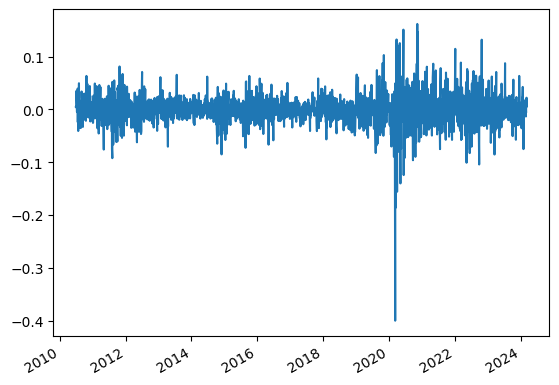

In [752]:
comp_merge_df['SLB'].pipe(log_returns).plot()
plt.show()

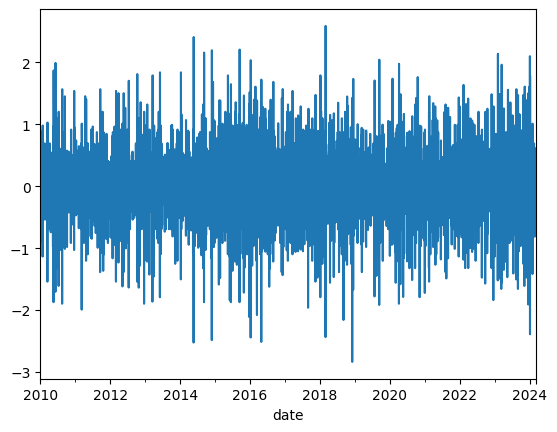

In [753]:
comp_sent_df.query("company == 'schlumberger'")['sentiment'].pipe(lambda x : x * 100).apply(np.log).diff().plot()
plt.show()

In [ ]:
slb_ret = comp_merge_df['SLB'].pipe(log_returns)
slb_sent = comp_sent_df.query("company == 'schlumberger'")['sentiment'].pipe(lambda x : x * 100).apply(np.log).diff()

slb_combined = pd.merge(slb_ret, slb_sent, left_index= True, right_index= True).dropna()

slb_combined['SLB'].apply(lambda x : x * 100).cumsum().plot()
slb_combined['sentiment'].cumsum().plot()
plt.legend()
plt.show()

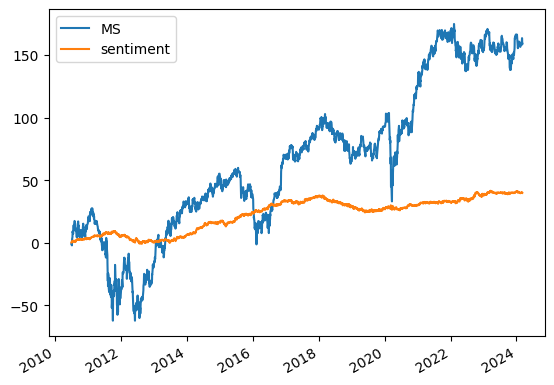

In [809]:
comp_ticker = 'MS'
company_name = top50_dim_df[['company_sent', 'ticker']].query("ticker == @comp_ticker")['company_sent'].iloc[0]
ret = comp_merge_df[comp_ticker].pipe(log_returns)
sent = comp_sent_df.query("company == @company_name")['sentiment'].pipe(lambda x : x * 100).apply(np.log).diff()

combined = pd.merge(ret, sent, left_index= True, right_index= True).dropna()

combined[comp_ticker].apply(lambda x : x * 100).cumsum().plot()
combined['sentiment'].cumsum().plot()

plt.legend()
plt.show()

In [803]:
comp_sent_df.company.unique()

array(['morgan_stanley', 'carnival_plc', 'the_blackstone_group',
       'bank_of_america', 'kroger', 'general_mills', 'cvs_health',
       'american_airlines', 'united_technologies', 'stmicroelectronics',
       'merckco', 'applied_materials', 'duke_energy', 'dominion_energy',
       'walmart', 'chevron', 'nissan', 'at_t', 'honda', 'infosys_ltd',
       'pepsico', 'wells_fargo', 'marriott_international',
       'delta_air_lines', 'schlumberger', 'johnson_johnson',
       'conocophillips', 'enbridge_inc', 'lloyds_banking', 'airbus',
       'comcast', 'tyson_foods', 'american_express', 'general_dynamics',
       'starbucks', 'oracle', 'banco_santander', 'gamestop', 'fedex',
       'hasbro', 'tesla_motors', 'icici_bank_ltd', 'jetblue_airways_corp',
       'salesforce_com', 'nvidia', 'micron_technology'], dtype=object)

In [873]:
def minmax_norm(df):
    return (df - df.min()) / (df.max() - df.min())

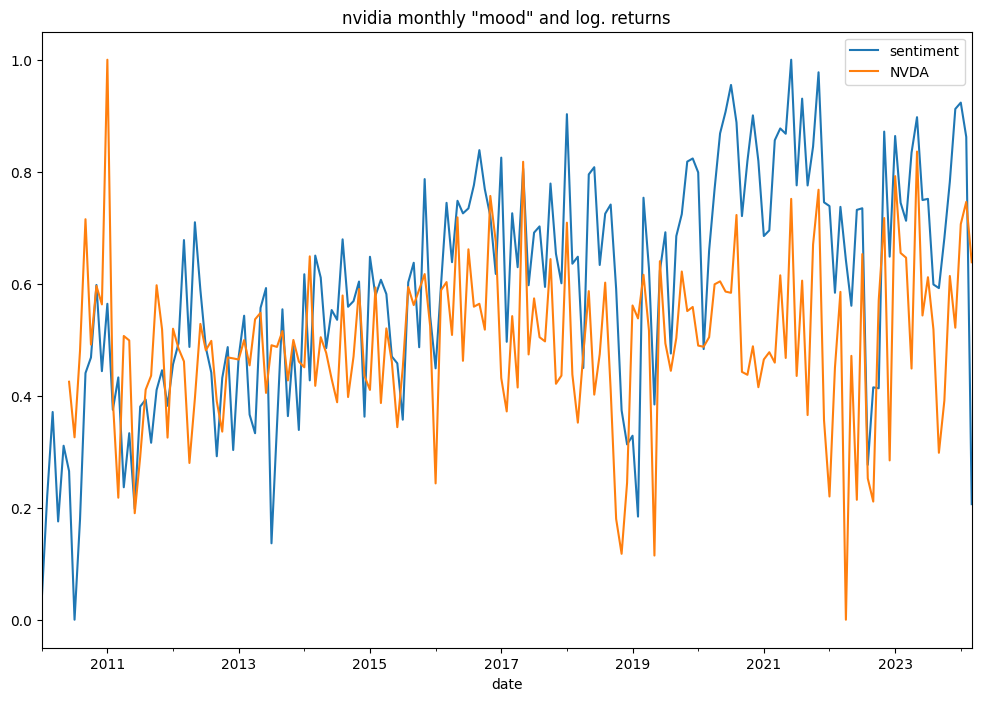

In [883]:
test_sent_comp = 'nvidia'

comp_sent_df.query("company == @test_sent_comp")['sentiment'].apply(lambda x: x - 0.5).groupby(pd.Grouper(freq= 'ME')).sum().pipe(minmax_norm).plot(figsize=(12,8))
comp_merge_df['NVDA'].pipe(log_returns).groupby(pd.Grouper(freq= 'ME')).sum().pipe(minmax_norm).plot()
plt.title(f'{test_sent_comp} monthly "mood" and log. returns')
plt.legend()
plt.show()